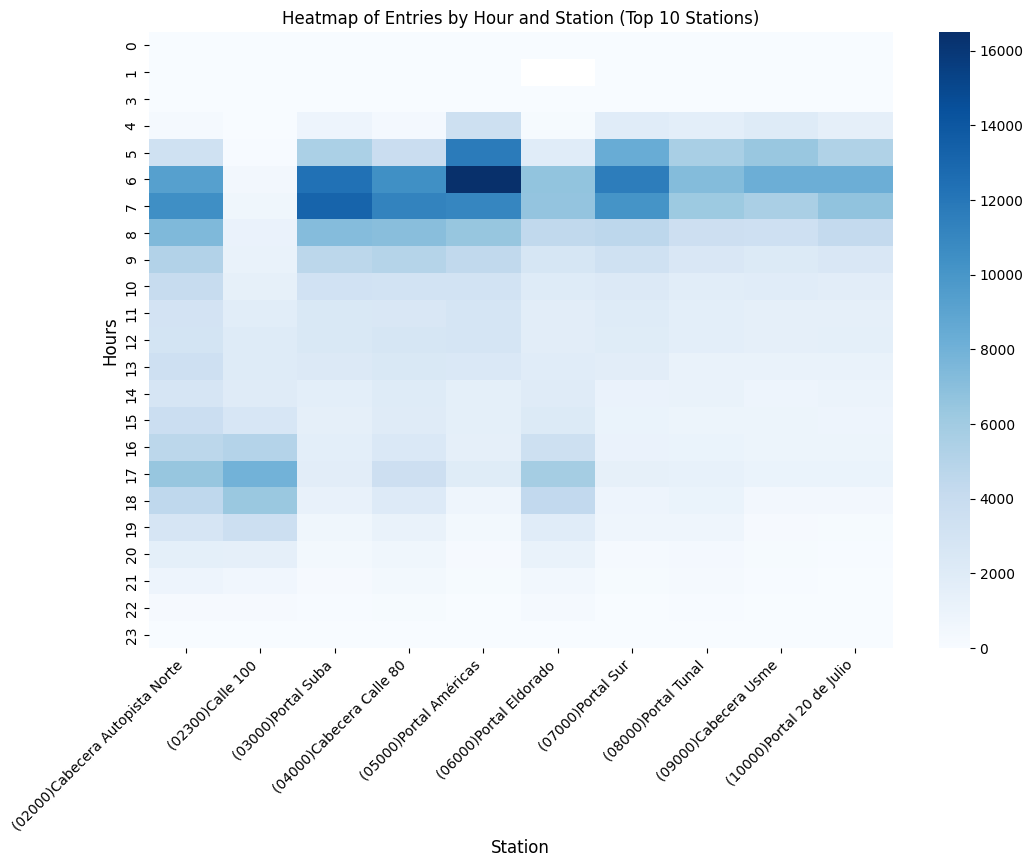

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('./salidas20230809.csv')
# Filtrando las primeras 20 estaciones más concurridas

# Agrupando por estación y sumando entradas y salidas
grouped_station = data.groupby('Estacion').agg({'Entradas_E':'sum', 'Salidas_S':'sum'}).reset_index()

# Filtrando las primeras 20 estaciones más concurridas
top_20_stations = grouped_station.sort_values(by='Entradas_E', ascending=False).head(10)

# Convertir 'Fecha_Transaccion' y 'Tiempo' a datetime y extraer la hora
data['Hour'] = pd.to_datetime(data['Fecha_Transaccion'] + ' ' + data['Tiempo']).dt.hour

# Filtrando los datos para incluir solo las 20 estaciones más concurridas
heatmap_data_top_20 = data[data['Estacion'].isin(top_20_stations['Estacion'])]

# Agrupando los datos por hora y estación, y sumando las entradas
heatmap_data_grouped = heatmap_data_top_20.groupby(['Hour', 'Estacion']).agg({'Entradas_E':'sum'}).reset_index()

# Usando pivot para transformar los datos para el heatmap
heatmap_data_pivot = heatmap_data_grouped.pivot(index="Hour", columns="Estacion", values="Entradas_E")

# Creando el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_pivot, cmap="Blues")

# Mejoras en la visualización
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rota y ajusta el tamaño de las etiquetas del eje X
plt.yticks(fontsize=10)  # Ajusta el tamaño de las etiquetas del eje Y
plt.xlabel('Station', fontsize=12)  # Cambia el nombre y tamaño
plt.ylabel('Hours', fontsize=12)  # Cambia el nombre y tamaño de la etiqueta del eje Y

plt.title('Heatmap of Entries by Hour and Station (Top 10 Stations)')
plt.show()